In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
from tqdm import trange

In [2]:
path = r"C:\Users\kaohunglin\Desktop\報告\台東年度議題\data\完整資料"
file_name = "Result_台東熱氣球嘉年華"
df = pd.read_csv(f"{path}\{file_name}.csv", encoding='utf_8_sig')
df.drop(columns=["Unnamed: 0"], inplace=True)

In [3]:
def create_channel_and_time_tags(df):
    df["標題和來源網站"] = df.apply(lambda x: str(x.標題)+str(x.來源網站), axis=1)
    df["網站"] = df.來源網站.apply(lambda x: x.split(" > ")[0])
    df["頻道"] = df.來源網站.apply(lambda x: x.split(" > ")[1])
    df["發佈時間_月"] = df.發佈時間.apply(lambda x: x.split(" ")[0].split("/")[1])
    df["發佈時間_日"] = df.發佈時間.apply(lambda x: x.split(" ")[0].split("/")[2])
    df["發佈時間_時"] = df.發佈時間.apply(lambda x: x.split(" ")[1].split(":")[0])
    df["發佈時間_日期"] = df.apply(lambda x: str(x.發佈時間_月)+"/"+str(x.發佈時間_日), axis=1)
    df["發佈時間_年月日"] = df.發佈時間.apply(lambda x: x.split(" ")[0])
    return df

In [5]:
df = create_channel_and_time_tags(df)

# 聲量趨勢

In [6]:
time_cat = "發佈時間_日期"
labeling_freq = 3
figgure_size = (18,6)
bar_width = 0.8
bar_color = "grey"
label_size = 15
x_label_name = ""
y_label_name = "聲量(則)"
y_label_pos = -0.08

In [7]:
df_time_series = df.groupby([time_cat]).size().to_frame().reset_index().rename(columns={0:"聲量"})
df_time_series["id"] = [x for x in range(len(df_time_series))]
# 調整時間圖示間距
df_time_series[time_cat+"_調整"] = df_time_series.apply(lambda x: x[time_cat] if int(x.id)%labeling_freq == 0 else " ", axis=1)

C:\Users\KAOHUN~1\AppData\Local\Temp/ipykernel_8636/1950784947.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=df_time_series[time_cat+"_調整"]) # 調整時間圖示間距


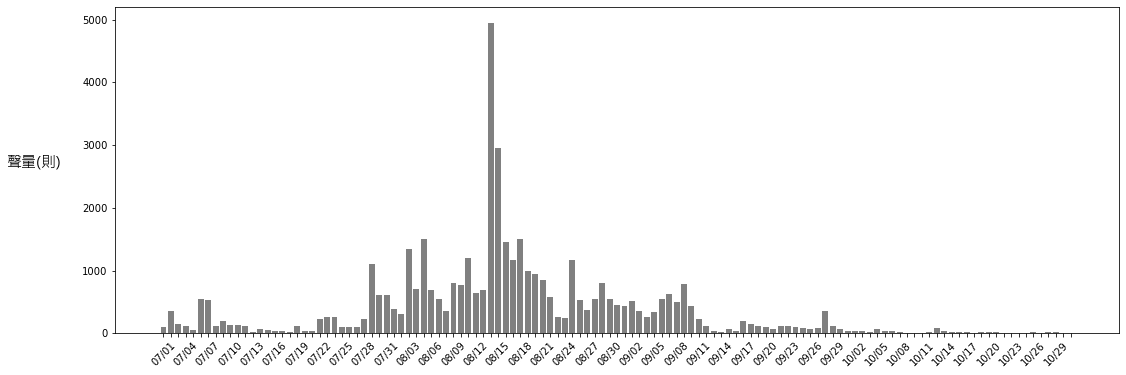

In [8]:
f,ax=plt.subplots(1,1,figsize=figgure_size)
# 繪製圖
ax.bar(df_time_series[time_cat], df_time_series.聲量, width=bar_width, color=bar_color)
ax.set_xticklabels(labels=df_time_series[time_cat+"_調整"]) # 調整時間圖示間距
# 旋轉x ticks
ax.tick_params(axis='x', labelrotation=45)
# 改變label字體
font_label = FontProperties(fname="微软正黑体.ttf", size=label_size)
# 設label
h = ax.set_ylabel(y_label_name,font=font_label)
# 旋轉ylabel和設定位置
h.set_rotation(0)
ax.yaxis.set_label_coords(y_label_pos,0.5)
ax.set_xlabel(x_label_name,font=font_label)
plt.show()

In [ ]:
fig = ax.get_figure() # 將目前數據圖存至fig
# bbox_inches = "tight" 可以讓圖表label不被吃掉
path = 'C:/Users/kaohunglin/Desktop/note/code/plots/回應比.png'
fig.savefig('C:/Users/kaohunglin/Desktop/note/code/plots/聲量趨勢.png', bbox_inches = "tight")

In [ ]:
"""
1. display the value of the bar
2. 聲量排行繪圖
"""

# 分類聲量排行

In [16]:
def value_counts_trans(table):
    Index = [x for x in table.index]
    Index.reverse()
    return list(np.flip(table.values)), Index

In [34]:
def plot_table(y_value,x_value,title,y_label_name,y_lable_xPos,bar_color,with_values=False,figsize=(10,8)):
    f,ax=plt.subplots(1,1,figsize=figsize)
    ax.barh(y=y_value, width=x_value, color=bar_color)
    # 設定字體和文字大小
    font = FontProperties(fname="微软正黑体.ttf", size=12)
    font_label = FontProperties(fname="微软正黑体.ttf", size=20)
    font_title = FontProperties(fname="微软正黑体.ttf", size=15)
    # 改變ticks字體
    ax.set_yticklabels(labels=y_value,font=font)
    h = ax.set_ylabel(y_label_name,font=font_label)
    # 旋轉ylabel和設定位置
    h.set_rotation(0)
    ax.yaxis.set_label_coords(y_lable_xPos,0.5)
    ax.set_xlabel("聲量",font=font_label)
    if with_values == True:
        rowNum = [x+1 for x in range(len(x_value))]
        for rowNum,row in zip(rowNum,x_value):
            xpos = 0
            xpos += row
            ax.text(xpos + 1, rowNum-1.05, str(round(row,2)), color='black')
    ax.set_title(title,font=font_title)
    plt.show()

C:\Users\KAOHUN~1\AppData\Local\Temp/ipykernel_8636/1216408461.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=y_value,font=font)


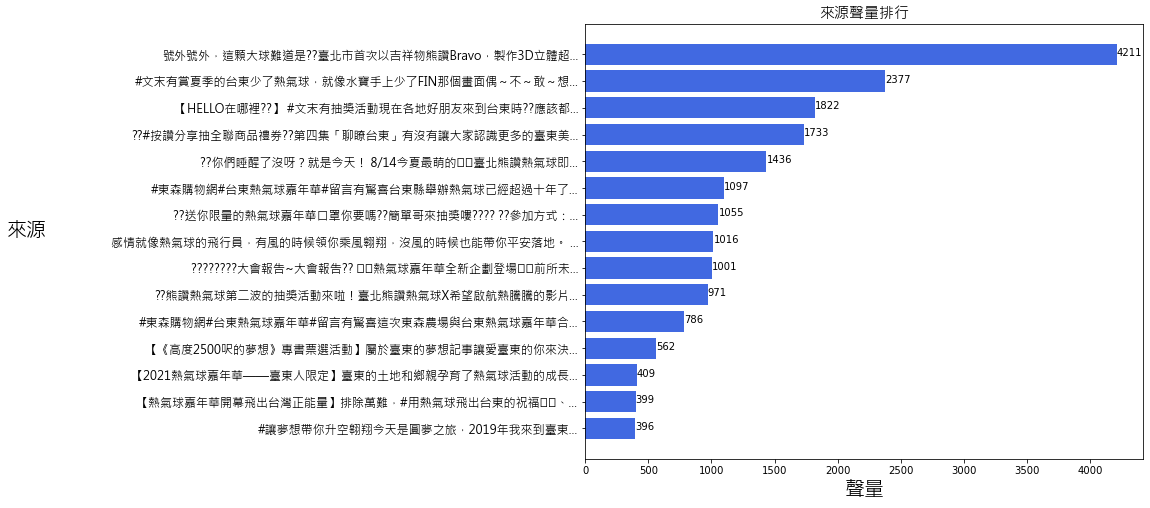

In [41]:
x_value, y_value = value_counts_trans(df.標題.value_counts()[:15])
plot_table(y_value,x_value,"來源聲量排行","來源",-1,"royalblue",with_values=True)

In [74]:
class cat_volumn_rank_plot:
    def __init__(self,y_value,x_value,title,y_label_name,y_lable_xPos,bar_color,with_values=False,figsize=(10,8)):
        self.y_value = y_value
        self.x_value = x_value
        self.title = title
        self.y_label_name = y_label_name
        self.y_lable_xPos = y_lable_xPos
        self.bar_color = bar_color
        self.with_values = with_values
        self.figsize = figsize
        
    def plot(self):
        f,ax=plt.subplots(1,1,figsize=self.figsize)
        ax.barh(y=self.y_value, width=self.x_value, color=self.bar_color)
        # 設定字體和文字大小
        font = FontProperties(fname="微软正黑体.ttf", size=12)
        font_label = FontProperties(fname="微软正黑体.ttf", size=20)
        font_title = FontProperties(fname="微软正黑体.ttf", size=15)
        # 改變ticks字體
        ax.set_yticklabels(labels=self.y_value,font=font)
        h = ax.set_ylabel(self.y_label_name,font=font_label)
        # 旋轉ylabel和設定位置
        h.set_rotation(0)
        ax.yaxis.set_label_coords(self.y_lable_xPos,0.5)
        ax.set_xlabel("聲量",font=font_label)
        if self.with_values == True:
            rowNum = [x+1 for x in range(len(self.x_value))]
            for rowNum,row in zip(rowNum,self.x_value):
                xpos = 0
                xpos += row
                ax.text(xpos + 1, rowNum-1.05, str(round(row,2)), color='black')
        ax.set_title(self.title,font=font_title)
        plt.show()
        
    def y_value_set(self,y_value_arg):
        self.y_value = y_value_arg
        return self
    
    def x_value_set(self,x_value_arg):
        self.x_value = x_value_arg
        return self
    
    def title_set(self,title_arg):
        self.title = title_arg
        return self
    
    def y_label_name_set(self,y_label_name_arg):
        self.y_label_name = y_label_name_arg
        return self
    
    def y_label_xPos_set(self,y_label_xPos_arg):
        self.y_label_xPos = y_label_xPos_arg
        return self
    
    def bar_color_set(self,bar_color_arg):
        self.bar_color = bar_color_arg
        return self
    
    def with_values_set(self,with_values_arg):
        self.with_values = with_values_arg
        return self
    
    def figsize_set(self,figsize_arg):
        self.figsize = figsize_arg
        return self

C:\Users\KAOHUN~1\AppData\Local\Temp/ipykernel_8636/3577437811.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=self.y_value,font=font)


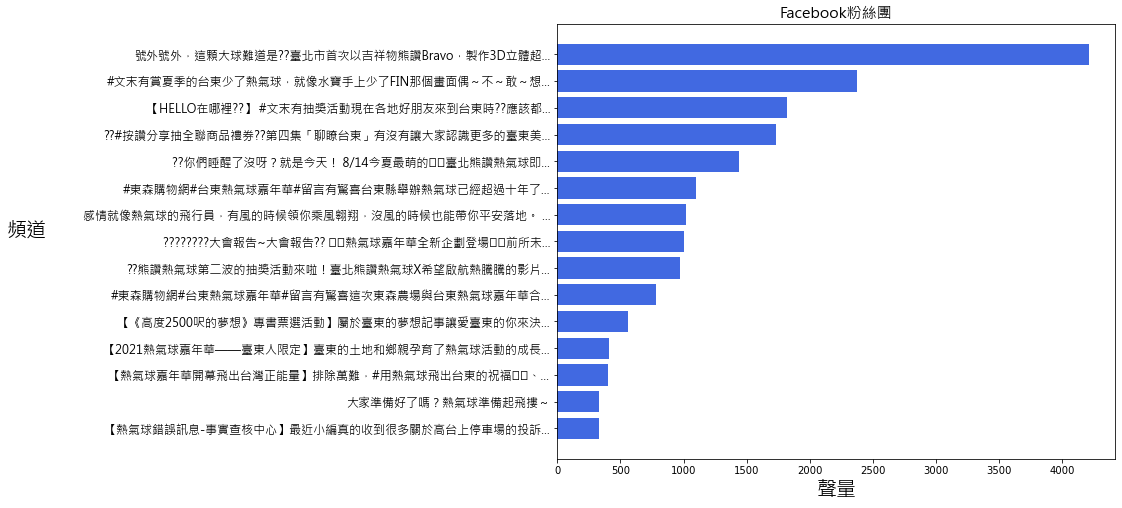

In [75]:
x_value, y_value = value_counts_trans(df[df.網站=="Facebook粉絲團"].標題.value_counts()[:15])
disp_plot = cat_volumn_rank_plot(y_value,x_value,"Facebook粉絲團","頻道",-0.95,"royalblue",with_values=False)
disp_plot.plot()

C:\Users\KAOHUN~1\AppData\Local\Temp/ipykernel_8636/3577437811.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=self.y_value,font=font)


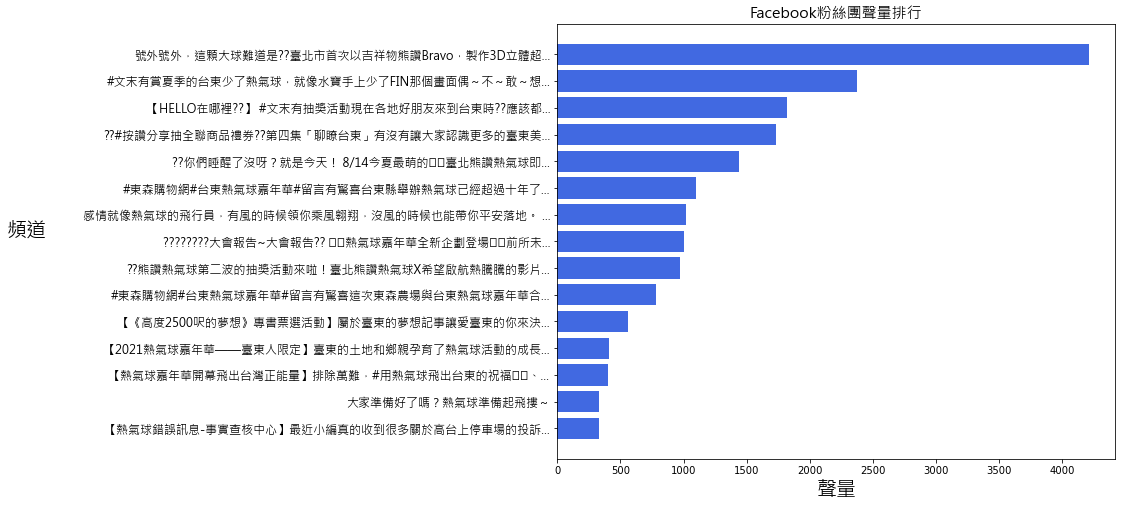

In [76]:
disp_plot.title_set("Facebook粉絲團聲量排行")
disp_plot.plot()

# 正負聲量 + P/N比 圖 

In [9]:
def cal_PN_ratio(group_by_cat):
    # 計算總評論數
    df_total_count = df.groupby([group_by_cat]).size().to_frame().reset_index()
    df_total_count.rename(columns={0:"總評論數"}, inplace=True)
    # 計算正面評論數
    df_positive_count = df[df.情緒標記=="正面"].groupby([group_by_cat]).size().to_frame().reset_index()
    df_positive_count.rename(columns={0:"正面評論數"}, inplace=True)
    # 計算負面評論數
    df_negative_count = df[df.情緒標記=="負面"].groupby([group_by_cat]).size().to_frame().reset_index()
    df_negative_count.rename(columns={0:"負面評論數"}, inplace=True)
    # 合併dataframes
    df_sentiment = (df_positive_count.merge(df_negative_count, on=[group_by_cat], how="outer")
                                     .merge(df_total_count, on=[group_by_cat], how="outer")
                                     .fillna(0))
    # 計算情緒正負比 (P+1/N+1)
    df_sentiment["P/N比"] = df_sentiment.apply(lambda x: (x.正面評論數+1)/(x.負面評論數+1), axis=1)
    return df_sentiment

In [10]:
df_sentiment = cal_PN_ratio("發佈時間_日期")

In [13]:
df_sentiment_count = df_sentiment.melt(id_vars=["發佈時間_日期"], value_vars=["正面評論數","負面評論數"]
                                       , var_name="情緒方向", value_name="評論數")

In [11]:
labeling_freq = 3
df_sentiment["id"] = [x for x in range(len(df_sentiment.發佈時間_日期))]
df_sentiment["發佈時間_日期_調整"] = df_sentiment.apply(lambda x: x[time_cat] if int(x.id)%labeling_freq == 0 else " ", axis=1)

C:\Users\KAOHUN~1\AppData\Local\Temp/ipykernel_8636/2509702790.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=df_sentiment["發佈時間_日期_調整"])


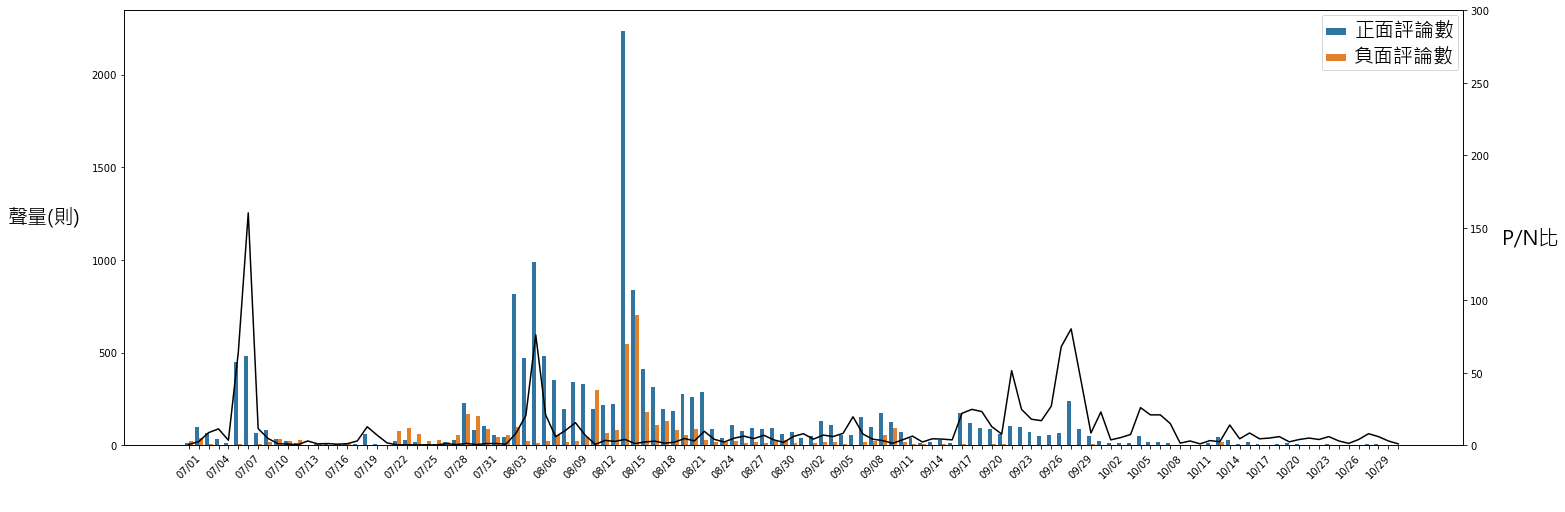

'\nlegend加入P/N比\n'

In [14]:
f,ax=plt.subplots(1,1,figsize=(24,8))
font_label = FontProperties(fname="微软正黑体.ttf", size=20)
g = sns.barplot(x="發佈時間_日期", y="評論數", hue="情緒方向", data=df_sentiment_count)
# 設定右側y label
ax2 = ax.twinx()
line = ax2.plot(df_sentiment.發佈時間_日期, df_sentiment["P/N比"], color="black")
ax2.set_ylim(0,300)
h2 = ax2.set_ylabel("P/N比",font=font_label)
h2.set_rotation(0)
ax2.yaxis.set_label_coords(1.05,0.5)
# 設定x ticks
ax.set_xticklabels(labels=df_sentiment["發佈時間_日期_調整"])
ax.tick_params(axis='x', labelrotation=45)
h = ax.set_ylabel("聲量(則)",font=font_label)
# 旋轉ylabel和設定位置
h.set_rotation(0)
ax.yaxis.set_label_coords(-0.06,0.5)
ax.set_xlabel(" ",font=font_label)
# 修改legend text字體
plt.setp(ax.get_legend().get_texts(), font=font_label)
# 移除legen tile
g.legend_.set_title(None)
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles.append(line), labels=labels.append("P/N比"))
plt.show()

"""
legend加入P/N比
"""

# handles, labels = ax.get_legend_handles_labels()
# print(handles)
# print(labels)
# ax.legend(handles=handles.append(line), labels=labels.append("P/N比"))